<a href="https://colab.research.google.com/github/huunghia160799/Dive-into-Deep-Learning/blob/master/Chapter_2_Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1. Data Manipulation

In [4]:
!pip install mxnet
!pip install d2l

In [0]:
from mxnet import np, npx
npx.set_np()

In [0]:
x = np.arange(12)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [0]:
x = x.reshape((3, 4))
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [0]:
x = np.empty((3, 4))
x

array([[1.7221577e-37, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

In [0]:
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [0]:
np.ones((2, 3, 4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [0]:
np.random.normal(0, 1, size=(3, 4))

array([[-1.771029  , -0.5459446 , -0.45138445, -2.3556297 ],
       [ 0.57938355,  0.5414402 , -1.856082  ,  2.6785066 ],
       [-1.9768796 ,  1.2546344 , -0.20801921, -0.54877394]])

In [0]:
x = np.array([1, 2, 4, 8])
y = np.array([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(array([ 3.,  4.,  6., 10.]),
 array([-1.,  0.,  2.,  6.]),
 array([ 2.,  4.,  8., 16.]),
 array([0.5, 1. , 2. , 4. ]),
 array([ 1.,  4., 16., 64.]))

In [0]:
x = np.arange(12).reshape(3, 4)
y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
np.concatenate([x, y], axis=0), np.concatenate([x, y], axis=1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [0]:
x = np.arange(12).reshape(3, 4)
y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
z = np.ones((3, 4))
np.concatenate([x, y, z], axis=0), np.concatenate([x, y, z], axis=1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.,  1.,  1.,  1.,  1.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.,  1.,  1.,  1.,  1.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.,  1.,  1.,  1.,  1.]]))

## Exercises

In [0]:
# 1
x = np.arange(12).reshape(3, 4)
y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
np.concatenate([x, y], axis=0), np.concatenate([x, y], axis=1)

print(x < y)
print(x > y)

[[ True False  True False]
 [False False False False]
 [False False False False]]
[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]


In [0]:
# 2
a = np.arange(4).reshape(2, 2, 1)
b = np.arange(6).reshape(1, 2, 3)
a + b

array([[[0., 1., 2.],
        [4., 5., 6.]],

       [[2., 3., 4.],
        [6., 7., 8.]]])

# 2.2. Data preprocessing

In [0]:
import os

def mkdir_if_not_exist(path):
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [0]:
data_file = '../data/house_tiny.csv'
mkdir_if_not_exist('../data')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row is a data point
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [0]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [0]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2] 
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [0]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [0]:
# Convert to ndarrray format

X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

# 2.3. Linear Algebra

In [0]:
from mxnet import np, npx
npx.set_np()

x = np.array(3.0)
y = np.array(2.0)

x + y, x * y, x / y, x ** y

(array(5.), array(6.), array(1.5), array(9.))

In [0]:
# L2 Norm
u = np.array([3., 4.])
np.linalg.norm(u)

array(5.)

In [0]:
# Squared L2 Norm
u = np.array([3., 4.])
(u ** 2).sum()

array(25.)

In [0]:
# L1 Norm
u = np.array([3., 4.])
np.abs(u).sum()

array(7.)

## Exercises

1.
Transposing a matrix is essentially flipping it with respect to the main diagonal. Therefore, tranposing a matrix by two times is like flipping that matrix back to its original state.

2.
Suppose that $\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}, 
\mathbf{B}=\begin{bmatrix} b_{11} & b_{12} & \cdots & b_{1n} \\ b_{21} & b_{22} & \cdots & b_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ b_{m1} & b_{m2} & \cdots & b1_{mn} \\ \end{bmatrix}$.



$\mathbf{A}^\top  + \mathbf{B}^\top =
   \begin{bmatrix}
       a_{11} & a_{21} & \dots  & a_{m1} \\
       a_{12} & a_{22} & \dots  & a_{m2} \\
       \vdots & \vdots & \ddots  & \vdots \\
       a_{1n} & a_{2n} & \dots  & a_{mn}
   \end{bmatrix}
   +
   \begin{bmatrix}
       b_{11} & b_{21} & \dots  & b_{m1} \\
       b_{12} & b_{22} & \dots  & b_{m2} \\
       \vdots & \vdots & \ddots  & \vdots \\
       b_{1n} & b_{2n} & \dots  & b_{mn}
   \end{bmatrix}
   =
   \begin{bmatrix}
       a_{11} + b_{11} & a_{21} + b_{21} & \dots  & a_{m1} + b_{m1} \\
       a_{12} + b_{12} & a_{22} + b_{22} & \dots  & a_{m2} + b_{m2} \\
       \vdots & \vdots & \ddots  & \vdots \\
       a_{1n} + b_{1n} & a_{2n} + b_{2n} & \dots  & a_{mn} + b_{mn}
   \end{bmatrix}
   = \mathbf{B}^\top
   $
Hence, $q.e.d.$

3.
Suppose that $\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}$.

$\mathbf{A} + \mathbf{A}^\top =
    \begin{bmatrix}
       a_{11} + a_{11} & a_{12} + a_{21} & \dots  & a_{1m} + a_{m1} \\
       a_{21} + a_{12} & a_{22} + a_{22} & \dots  & a_{2m} + a_{m2} \\
       \vdots & \vdots & \ddots  & \vdots \\
       a_{n1} + a_{1n} & a_{2n} + a_{n2} & \dots  & a_{nm} + a_{mn}
   \end{bmatrix}
$

From this expression, we can see that $\forall i, j,  (\mathbf{A} + \mathbf{A}^\top)_{ij} = (\mathbf{A} + \mathbf{A}^\top)_{ij}$. Therefore, $\mathbf{A} + \mathbf{A}^\top$ is a symmetric matrix.

4.
The len of the tensor $X$ is 2, since $len(X)$ returns the size of the first dimension of the tensor.




5.
$len(X)$ always returns the length corresponding to the first axis. In other words, the result is always the lengt of the axis with index 0.

In [0]:
import numpy as np

a = np.ones((2, 3, 4))
len(a)

2

6.
The result of this evaluation is an error. This is caused by the mismatch of shape between the two matrices. If we transposed the matrix $\bf{A}$ before performing the calculation, there would be no errors.

In [0]:
A = np.arange(20).reshape(5, 4)
A / A.sum(axis=1)

ValueError: ignored

In [0]:
A = np.arange(20).reshape(5, 4)
A.T / A.sum(axis=1)

array([[0.        , 0.18181818, 0.21052632, 0.22222222, 0.22857143],
       [0.16666667, 0.22727273, 0.23684211, 0.24074074, 0.24285714],
       [0.33333333, 0.27272727, 0.26315789, 0.25925926, 0.25714286],
       [0.5       , 0.31818182, 0.28947368, 0.27777778, 0.27142857]])

7.
You would need to travel on the streets (ie., travelling vertically and horizontally), so no diagonal movement is allowed.

8.
The shape of the summation along axis 0, 1, and 2 are $(3, 4), (2, 4),$ and $(2, 3)$, respectively.

In [0]:
B = np.ones((2, 3, 4))

print(B.sum(axis=0).shape)
print(B.sum(axis=1).shape)
print(B.sum(axis=2).shape)

(3, 4)
(2, 4)
(2, 3)


8.
For an arbitrary shape matrix, the result is the Frobenius norm of the matrix.

In [0]:
B = np.ones((2, 3, 4, 2))
np.linalg.norm(B)

6.928203230275509

# 2.4. Calculus

## Exercises

1.

In [0]:
!pip install d2l

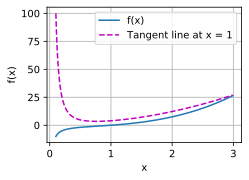

In [0]:
from d2l import use_svg_display, set_figsize, set_axes, plot

def f(x):
    return x**3 - 1 / x

def f_prime(x):
    return 3 * x ** 2 + 1 / (x**2)

x = np.arange(0.1, 3, 0.01)

plot(x, [f(x), f_prime(x)], 'x', 'f(x)', legend=['f(x)', 'Tangent line at x = 1'])

2.

$\frac{\partial f}{\partial x_1} = 6x_1$

$\frac{\partial f}{\partial x_2} = 5e^{x_2}$

3.
$f(x) = ||x||_2 = \sqrt{\sum_{i=1}^n x_i^2} = (\sum_{i=1}^n x_i^2)^{1/2}$

$\frac{\partial f}{\partial x_i} = \frac{1}{2} (\sum_{i=1}^n x_i^2)^{-1/2} \times 2x_i = x_i (\sum_{i=1}^n x_i^2)^{-1/2}, \forall i \in [1, 2, \ldots, n]$

4.
The chain rule can be applied as follows:

$$\frac{du}{da} = \frac{du}{dx} \frac{dx}{da} + \frac{du}{dy} \frac{dy}{da} + \frac{du}{dz} \frac{dz}{da}$$

$$\frac{du}{db} = \frac{du}{dx} \frac{dx}{db} + \frac{du}{dy} \frac{dy}{db} + \frac{du}{dz} \frac{dz}{db}$$

# 2.5. Automatic Differentiation

In [0]:
from mxnet import autograd, np, npx
npx.set_np()

In [0]:
x = np.arange(4)
x

array([0., 1., 2., 3.])

In [0]:
x.attach_grad()

In [0]:
x.grad

array([0., 0., 0., 0.])

In [0]:
with autograd.record():
    y = 2 * np.dot(x, x)

y

array(28.)

In [0]:
y.backward(retain_graph=True)

In [0]:
x.grad

array([ 0.,  4.,  8., 12.])

## Exercises

1.
Because the first derivative is easier to approximate using [numerical differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation) than the second derivative.

2.
There would be error, because the computational graph is cleared after calling `backwards()`. We can change that by adding `retain_graph=True` to the function `backwards()`: ```y.backward(retain_graph=True)```

3.
The new matrix `d` is now the Jacobian matrix of `a`, ie., every element of `d` is the partial derivative of `f` with respect to the corresponding element in `a`.

In [0]:
def f(a):
    b = a * 2
    while np.linalg.norm(b) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = np.random.normal(size=(3, 4))
a.attach_grad()
with autograd.record():
    d = f(a)
d.backward()

In [0]:
a.grad

array([[256., 256., 256., 256.],
       [256., 256., 256., 256.],
       [256., 256., 256., 256.]])

In [0]:
d

array([[ 566.3248 ,  297.74814,  198.14497,  123.85398],
       [ 267.12073,   76.68825,  303.08493,   39.17452],
       [ 484.2781 , -299.21658, -316.0938 ,  398.8662 ]])

4.
First I am going define a new function:

In [0]:
def f(a):
    b = a ** 2
    while np.linalg.norm(b) < 10:
        b = b * 2
    if b.sum() > 0:
        return b
    else:
        return 100 * b

In [0]:
from math import exp

a = np.random.normal(2, 1)
a.attach_grad()
# create a new copy of a with the name b
b = a.copy()

with autograd.record():
    # does this count as siamese???
    d = f(a) + f(b)
    e = np.exp(d)
e.backward()
d, e

(array(26.612879), array(3.6126543e+11))

In [0]:
# This is interesting, using copy() does not keep the effect of attach_grad()
a.grad, b.grad

(array(3.7273687e+12), None)

5.
My solution is computing the derivative of $sin(x)$ using autograd. First I compute $y=sin(x)$, then backpropagate through $y$.

In [0]:
def f_prime(x):
    x.attach_grad()
    with autograd.record():
        y = np.sin(x)
    y.backward()
    return x.grad

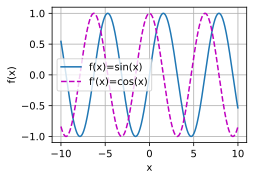

In [0]:
# !pip install d2l
from d2l import plot
# from numpy install sin

x = np.arange(-10, 10, 0.01)

y = np.sin(x)
y_prime = f_prime(x)

plot(x, [np.sin(x), f_prime(x)], 'x', 'f(x)', legend=['f(x)=sin(x)', 'f\'(x)=cos(x)'])

6. Incomplete

In [0]:
from mxnet.ndarray import sort

In [0]:
def f_prime(prices):
    """Compute the gradient of the final price with respect to the winning bid"""
    prices = sort(prices.as_nd_ndarray()).asnumpy()
    prices = np.array(prices)
    prices[-1].attach_grad()
    with autograd.record():
        prices[:] = prices[:-1]
    final_price.backward()
    return prices[-1].grad

In [0]:
x = np.random.normal(100, 100, size=(100, 1))
print(f_prime(x))

# 2.6. Probability

## Exercises
1.

In [0]:
%matplotlib inline
import d2l
from mxnet import np, npx
import random
npx.set_np()

In [2]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [3]:
np.random.multinomial(10, fair_probs)


array([1, 1, 5, 1, 1, 1], dtype=int64)

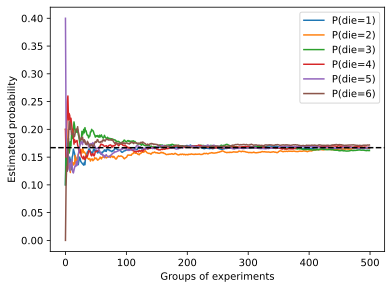

In [4]:
# original configurations

counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

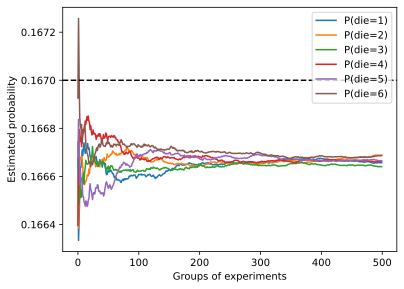

In [5]:
# When we increase the number of examples, the variance between different probabilities are still large, although, it is smaller

counts = np.random.multinomial(1000000, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

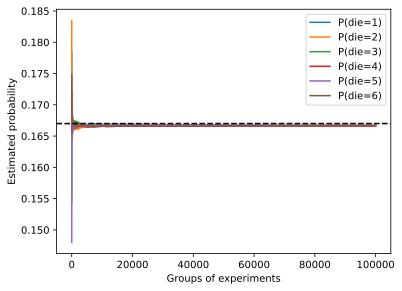

In [6]:
# With more groups of experiments, the values start converging to a value
counts = np.random.multinomial(1000, fair_probs, size=100000)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

2.
With the value of $P(\mathcal{A} \cup \mathcal{B})$, the maximum value is obtained when A and B are disjoint events. When this happen, the following is true: $P(\mathcal{A} \cup \mathcal{B}) = P(\mathcal{A}) + P(\mathcal{B})$, but the $P(\mathcal{A} \cap \mathcal{B})$ is minimum: $P(\mathcal{A} \cap \mathcal{B}) = 0$. The minimum value of the union is obtained when the two events fully overlap: $P(\mathcal{A} \cup \mathcal{B}) = P(\mathcal{A}) = P(\mathcal{B}) = P(\mathcal{A} \cap \mathcal{B})$.

3.
The joint probability can be simplified as follows:
$P(A, B, C) = P(A) P(C, B | A) = P(A) P(B|A) P (C|B).$

4.
Although the first test is more accurate, when we only using only one kind of test, we risk introducing the bias of this test into our result. Maybe the distribution of the data used in the testing procedure of the two test are not the real distribution of the real data. Therefore, it is safer to confirm the result with two methods.